# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # convert to celcius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | voi
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | kawthoung
City not found. Skipping...
Processing Record 5 of Set 1 | kone
Processing Record 6 of Set 1 | kapuskasing
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | paris
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | shingu
Processing Record 12 of Set 1 | illizi
Processing Record 13 of Set 1 | lewistown
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | puerto colombia
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of Set 1 | ud

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,0.29,86,20,4.12,GB,1701228457
1,voi,-3.3945,38.5630,22.26,89,50,1.09,KE,1701228463
2,edinburgh of the seven seas,-37.0676,-12.3116,14.51,82,93,8.70,SH,1701228468
3,kone,-21.0595,164.8658,29.24,53,100,2.18,NC,1701228358
4,kapuskasing,49.4169,-82.4331,-16.95,85,20,2.06,CA,1701228244


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,0.29,86,20,4.12,GB,1701228457
1,voi,-3.3945,38.5630,22.26,89,50,1.09,KE,1701228463
2,edinburgh of the seven seas,-37.0676,-12.3116,14.51,82,93,8.70,SH,1701228468
3,kone,-21.0595,164.8658,29.24,53,100,2.18,NC,1701228358
4,kapuskasing,49.4169,-82.4331,-16.95,85,20,2.06,CA,1701228244


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

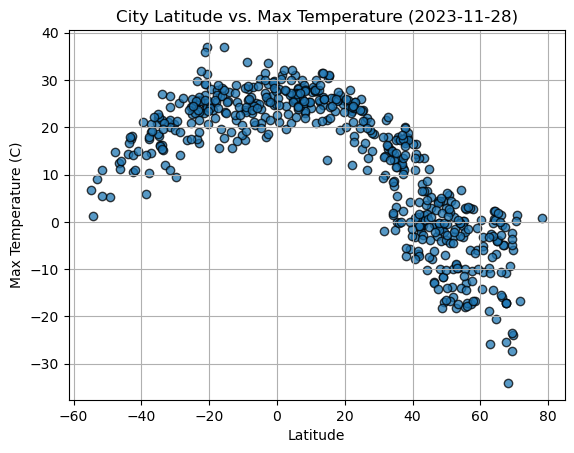

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            edgecolors="black", 
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

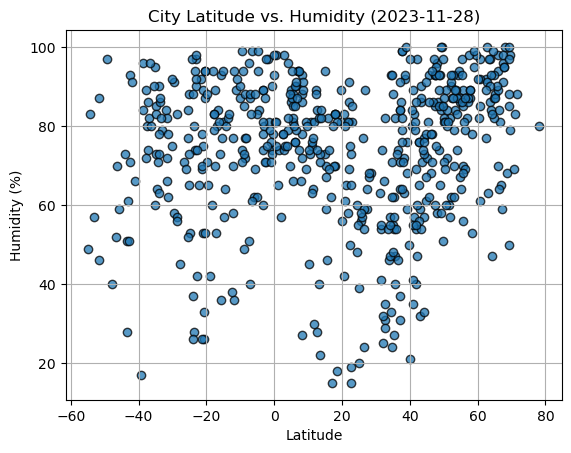

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            edgecolors="black", 
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

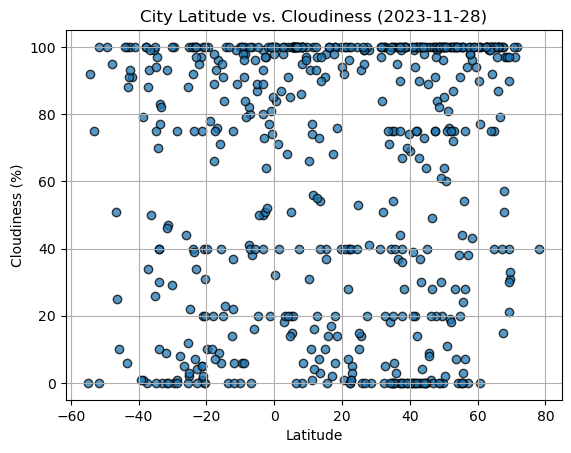

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            edgecolors="black", 
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

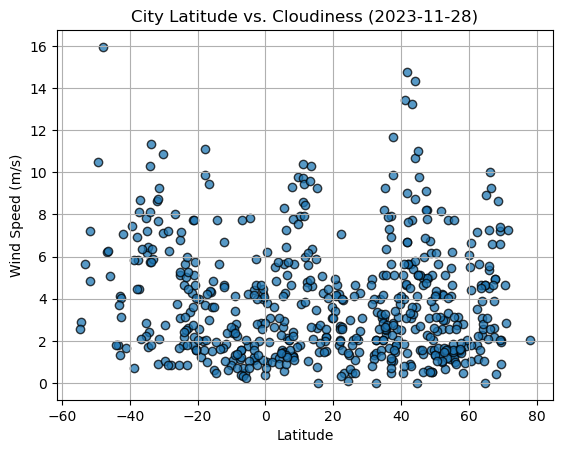

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            edgecolors="black", 
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x, y, title, xlabel, ylabel, txt_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept

    # Create line equation string
    line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create plot
    plt.scatter(x, y, edgecolors="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x, regress_values, "r-", label=line_equation)
    plt.annotate(line_equation, txt_coords, fontsize=15, color="red")

    # Set title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Display R-squared
    print(f"The r-squared is: {rvalue**2}")

    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,0.29,86,20,4.12,GB,1701228457
4,kapuskasing,49.4169,-82.4331,-16.95,85,20,2.06,CA,1701228244
7,paris,48.8534,2.3488,4.50,93,0,1.54,FR,1701228472
8,lihue,21.9789,-159.3672,23.77,81,40,2.06,US,1701228338
9,shingu,33.7333,135.9833,15.28,46,71,4.00,JP,1701228475


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,voi,-3.3945,38.5630,22.26,89,50,1.09,KE,1701228463
2,edinburgh of the seven seas,-37.0676,-12.3116,14.51,82,93,8.70,SH,1701228468
3,kone,-21.0595,164.8658,29.24,53,100,2.18,NC,1701228358
5,port-aux-francais,-49.3500,70.2167,5.25,97,100,10.49,TF,1701228469
6,bredasdorp,-34.5322,20.0403,16.32,64,97,1.69,ZA,1701228471


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7764837523985204


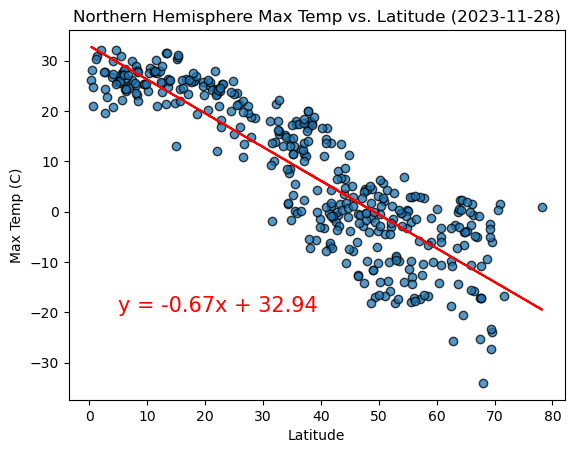

In [17]:
# Linear regression on Northern Hemisphere
plot_lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Northern Hemisphere Max Temp vs. Latitude (2023-11-28)', 'Latitude', 'Max Temp (C)', (5,-20))

The r-squared is: 0.4373810360769882


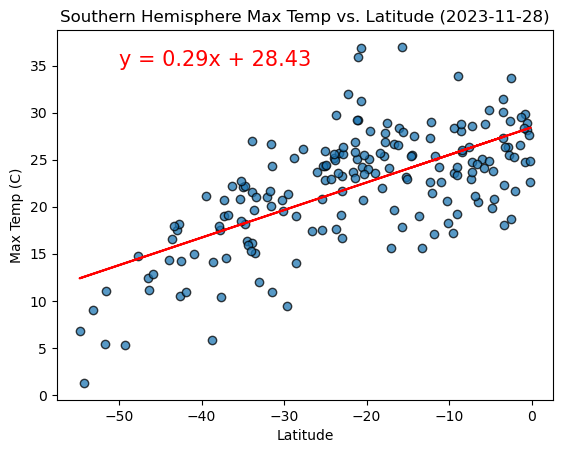

In [18]:
# Linear regression on Southern Hemisphere
plot_lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Southern Hemisphere Max Temp vs. Latitude (2023-11-28)', 'Latitude', 'Max Temp (C)', (-50, 35))

**Discussion about the linear relationship:** As latitude gets closer to 0, Max Temp increases. The Northern Hemisphere has a stronger relationship between latitude and temp.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04144133787569682


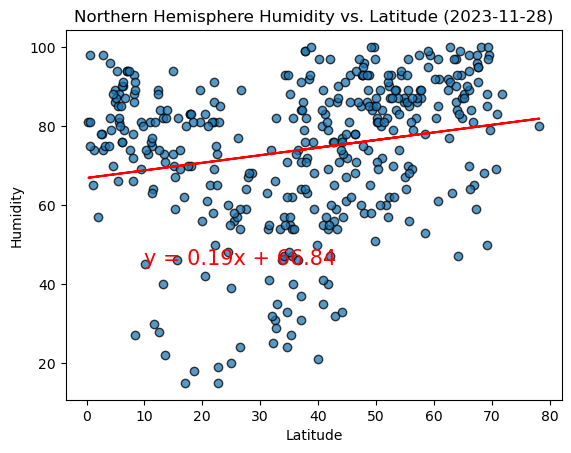

In [19]:
# Northern Hemisphere
plot_lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Northern Hemisphere Humidity vs. Latitude (2023-11-28)', 'Latitude', 'Humidity', (10, 45))

The r-squared is: 0.033610954401128074


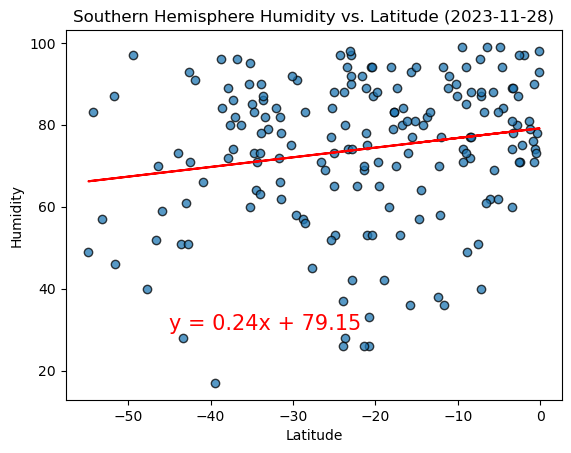

In [25]:
# Southern Hemisphere
plot_lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Southern Hemisphere Humidity vs. Latitude (2023-11-28)', 'Latitude', 'Humidity', (-45, 30))

**Discussion about the linear relationship:** There is no linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.007109097777474552


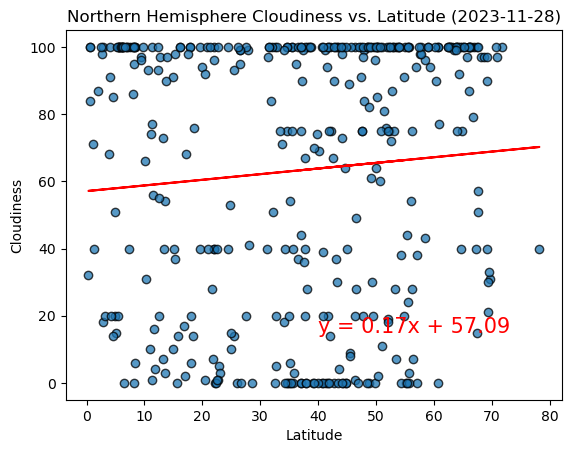

In [21]:
# Northern Hemisphere
plot_lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Northern Hemisphere Cloudiness vs. Latitude (2023-11-28)', 'Latitude', 'Cloudiness', (40, 15))

The r-squared is: 0.011847912832898433


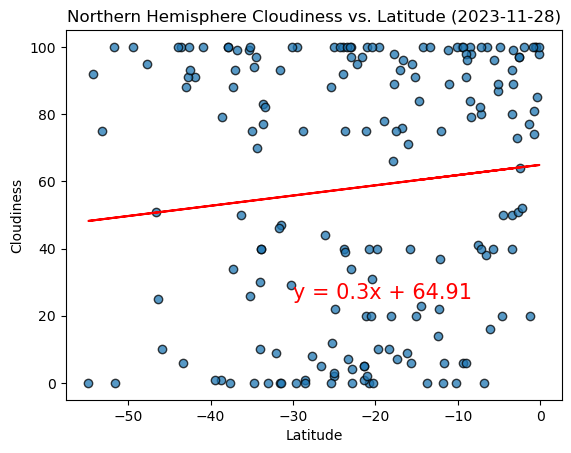

In [22]:
# Southern Hemisphere
plot_lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Northern Hemisphere Cloudiness vs. Latitude (2023-11-28)', 'Latitude', 'Cloudiness', (-30, 25))

**Discussion about the linear relationship:** There is no linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00012870950233020542


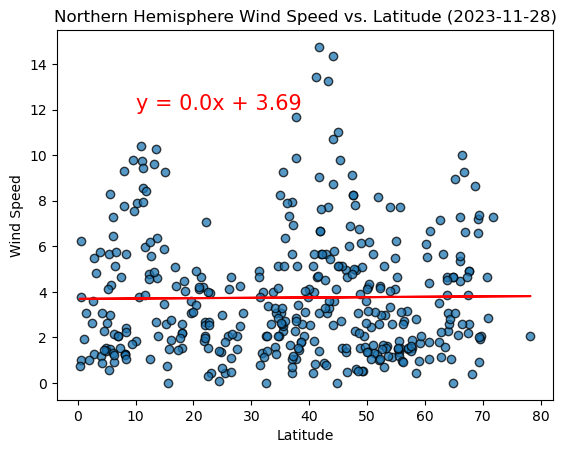

In [23]:
# Northern Hemisphere
plot_lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Northern Hemisphere Wind Speed vs. Latitude (2023-11-28)', 'Latitude', 'Wind Speed', (10, 12))

The r-squared is: 0.15359495298000006


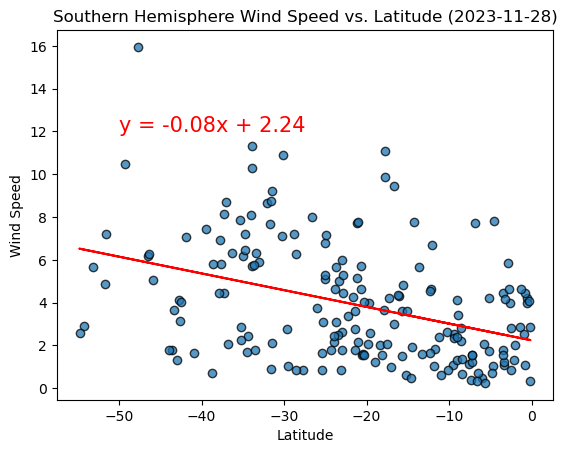

In [24]:
# Southern Hemisphere
plot_lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Southern Hemisphere Wind Speed vs. Latitude (2023-11-28)', 'Latitude', 'Wind Speed', (-50, 12))

**Discussion about the linear relationship:** There is no linear relationship.